#Building CNN Model for Image Classification

##Image Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/flowers',target_size=(64,64),class_mode='categorical')

Found 4332 images belonging to 5 classes.


In [4]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

##Creating Model


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten

In [6]:
model=Sequential()

##Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [7]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Dense layers
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(5,activation='softmax')) # Output layer

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                        

##Compiling the Model

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

##Fitting the Model

In [10]:
model.fit(x_train, epochs = 10,steps_per_epoch=len(x_train))

Epoch 1/10
136/136 [==============================] - 704s 5s/step - loss: 1.3167 - accuracy: 0.4518
Epoch 2/10
136/136 [==============================] - 40s 291ms/step - loss: 1.0287 - accuracy: 0.5889
Epoch 3/10
136/136 [==============================] - 39s 288ms/step - loss: 0.9389 - accuracy: 0.6290
Epoch 4/10
136/136 [==============================] - 41s 302ms/step - loss: 0.8689 - accuracy: 0.6627
Epoch 5/10
136/136 [==============================] - 39s 288ms/step - loss: 0.8099 - accuracy: 0.6932
Epoch 6/10
136/136 [==============================] - 39s 289ms/step - loss: 0.7902 - accuracy: 0.6939
Epoch 7/10
136/136 [==============================] - 42s 305ms/step - loss: 0.7345 - accuracy: 0.7184
Epoch 8/10
136/136 [==============================] - 40s 293ms/step - loss: 0.6813 - accuracy: 0.7396
Epoch 9/10
136/136 [==============================] - 42s 308ms/step - loss: 0.6499 - accuracy: 0.7528
Epoch 10/10
136/136 [==============================] - 40s 291ms/step - los

##Saving the Model

In [11]:
model.save('flowers.h5')

##Testing the Model

In [12]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [13]:
model=load_model('flowers.h5')

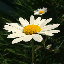

In [22]:
img1 = image.load_img(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/test1.jpg',target_size=(64,64))
img1

In [23]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [24]:
x=image.img_to_array(img1)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
y

0

In [25]:
index=['daisy','dandelion','rose','sunflower','tulip']
index[y]

'daisy'

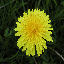

In [26]:
img2 = image.load_img(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/test2.jpg',target_size=(64,64))
img2

In [28]:
x=image.img_to_array(img2)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
index[y]

'dandelion'

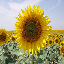

In [29]:
img3 = image.load_img(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/test3.jpg',target_size=(64,64))
img3

In [30]:
x=image.img_to_array(img3)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
index[y]

'sunflower'

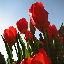

In [31]:
img4 = image.load_img(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/test4.jpg',target_size=(64,64))
img4

In [33]:
x=image.img_to_array(img4)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
index[y]

'tulip'

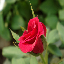

In [34]:
img5 = image.load_img(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/test5.jpg',target_size=(64,64))
img5

In [35]:
x=image.img_to_array(img5)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
index[y]

'rose'

##With Training and Testing Data

In [36]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import splitfolders

In [38]:
splitfolders.ratio("/content/drive/MyDrive/Assignment3(Flowers_dataset)/flowers", output="/content/drive/MyDrive/Assignment3(Flowers_dataset)", ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 4334 files [00:51, 84.37 files/s]


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/train',target_size=(64,64),class_mode='categorical')

Found 3466 images belonging to 5 classes.


In [41]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/val',target_size=(64,64),class_mode='categorical')

Found 868 images belonging to 5 classes.


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten

In [43]:
model=Sequential()

In [44]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Dense layers
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(5,activation='softmax')) # Output layer

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               9225900   
                                                                 
 dense_4 (Dense)             (None, 150)               45150     
                                                                 
 dense_5 (Dense)             (None, 5)                 755       
                                                      

In [46]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.fit(x_train, epochs = 10, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/10
109/109 [==============================] - 37s 335ms/step - loss: 0.6591 - accuracy: 0.7510 - val_loss: 0.9919 - val_accuracy: 0.6751
Epoch 2/10
109/109 [==============================] - 38s 346ms/step - loss: 0.6214 - accuracy: 0.7735 - val_loss: 1.0339 - val_accuracy: 0.6636
Epoch 3/10
109/109 [==============================] - 37s 338ms/step - loss: 0.5818 - accuracy: 0.7836 - val_loss: 1.0242 - val_accuracy: 0.6452
Epoch 4/10
109/109 [==============================] - 36s 328ms/step - loss: 0.5399 - accuracy: 0.8015 - val_loss: 1.1693 - val_accuracy: 0.6267
Epoch 5/10
109/109 [==============================] - 38s 346ms/step - loss: 0.5273 - accuracy: 0.7966 - val_loss: 1.0952 - val_accuracy: 0.6521
Epoch 6/10
109/109 [==============================] - 36s 329ms/step - loss: 0.5295 - accuracy: 0.7923 - val_loss: 1.0800 - val_accuracy: 0.6636
Epoch 7/10
109/109 [==============================] - 36s 330ms/step - loss: 0.4818 - accuracy: 0.8260 - val_loss: 1.2527 - val_ac

In [49]:
model=load_model('flowers.h5')

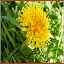

In [69]:
img6 = image.load_img(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/val/dandelion/3357432116_b3dce6fed3_n.jpg',target_size=(64,64))
img6

In [70]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [71]:
x=image.img_to_array(img6)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
y

1

In [72]:
index=['daisy','dandelion','rose','sunflower','tulip']
index[y]

'dandelion'

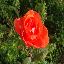

In [73]:
img7 = image.load_img(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/val/rose/3475572132_01ae28e834_n.jpg',target_size=(64,64))
img7

In [74]:
x=image.img_to_array(img7)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
index[y]

'rose'

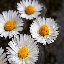

In [75]:
img8 = image.load_img(r'/content/drive/MyDrive/Assignment3(Flowers_dataset)/val/daisy/13826249325_f61cb15f86_n.jpg',target_size=(64,64))
img8

In [76]:
x=image.img_to_array(img8)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
index[y]

'daisy'